## EDA for Belgium Data Set

This notebook contains EDA for the Belgium Traffic Sign DataSet.

In [1]:
# Import in Library
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Allow image embeding in notebook
%matplotlib inline

In [2]:
# Function to load images in
def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels


# Load training and testing datasets.
ROOT_PATH = "traffic"
train_data_dir = os.path.join(ROOT_PATH, "datasets/BelgiumTS/Training")
test_data_dir = os.path.join(ROOT_PATH, "datasets/BelgiumTS/Testing")

images, labels = load_data(train_data_dir)

## Histogram/Distribution of Images By Label

Below is a plot of the number of images for each label. Some images will have more data to be trained on.

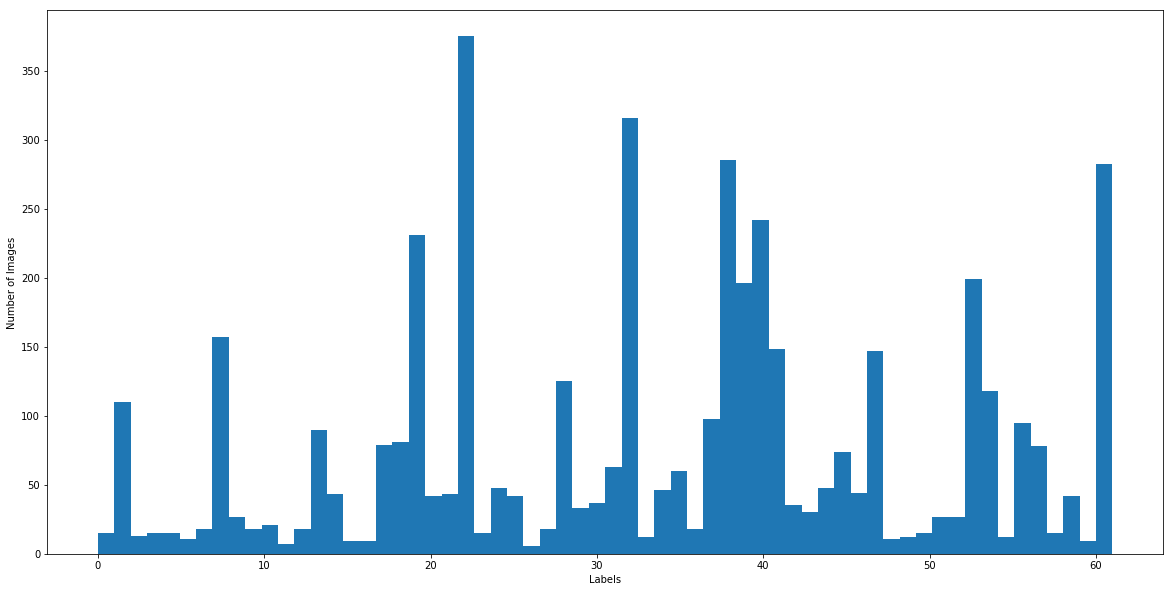

In [3]:
plt.figure(figsize=(20,10))
plt.hist(labels, 62)
plt.xlabel('Labels')
plt.ylabel('Number of Images')
# Show the plot
plt.show()

## Displaying Images and Labels

Below are sample images from each label. It is important to note that some labels have less images. For example, Label 16 only has 9 images, while label 61 has 282 images.

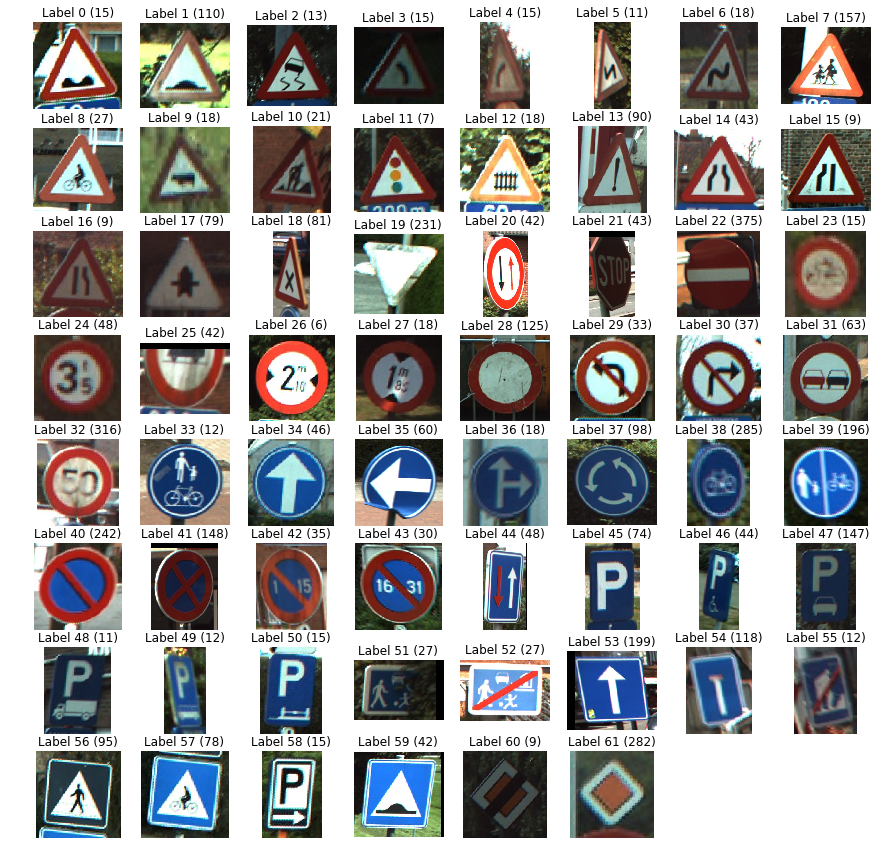

In [4]:
# Displays an image from each label and shows how many images are in each label
def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_and_labels(images, labels)

## 24 Images from a singluar label
Below are 24 images from a singular label. Label 32 contains images that have different numbers on them, yet they are labled the same. A sign with a 50, 10, or 70 are all under the same label. 

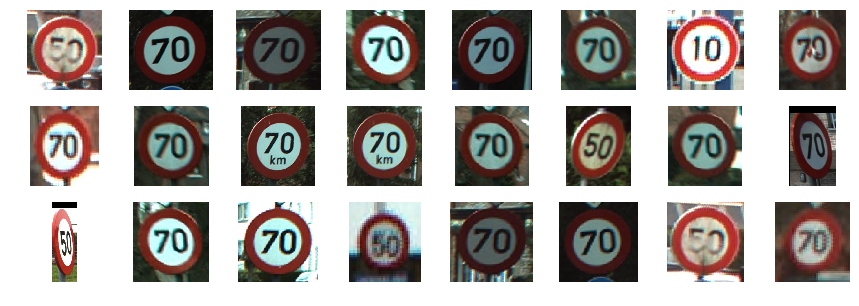

In [5]:
def display_label_images(images, label):
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(3, 8, i)  # 3 rows, 8 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

display_label_images(images, 32)

Signs from label 26 and 27 look similar, this will be a challenge the computer will have to overcome.

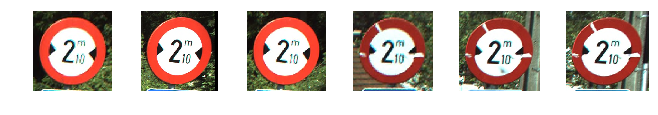

In [6]:
display_label_images(images, 26)

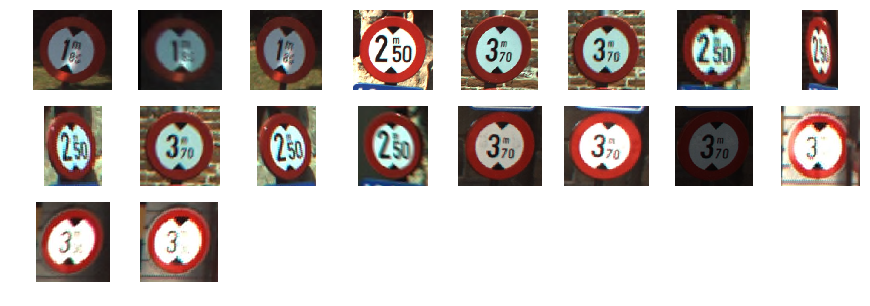

In [8]:
display_label_images(images, 27)

Look at average image size

In [9]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (144, 141, 3), min: 3, max: 255
shape: (183, 187, 3), min: 0, max: 255
shape: (244, 253, 3), min: 0, max: 255
shape: (99, 97, 3), min: 4, max: 247
shape: (145, 146, 3), min: 0, max: 255
